In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.model_selection

In [ ]:
#name clash because some names are already present in libraries.
#s

In [3]:
df = pd.read_csv("export_temp.csv")

In [24]:
df2 = pd.read_csv("export_humidity.csv")

In [25]:
df2

,name,time,value
0,humid,1704794517937319608,47.5
1,humid,1704794578153277938,47.5
2,humid,1704794638307925536,47.7
3,humid,1704794698833957628,47.7
4,humid,1704794758859593254,47.8
...,...,...,...
3110,humid,1705144778944252428,49.9
3111,humid,1705144839026505799,49.9
3112,humid,1705144899276896036,49.8
3113,humid,1705144959803881298,49.9


In [4]:
df

,name,time,value
0,temp,1704794517924041597,20.8
1,temp,1704794578142216471,20.8
2,temp,1704794638296149439,20.8
3,temp,1704794698815274975,20.8
4,temp,1704794758850190313,20.8
...,...,...,...
2959,temp,1705144778941468598,17.3
2960,temp,1705144839024060351,17.3
2961,temp,1705144899274170955,17.3
2962,temp,1705144959799099048,17.3


In [5]:
df.shape

(2964, 3)

In [27]:
data = df.drop("name", axis=1)
data2 = df2.drop("name", axis=1)

In [8]:
data

,time,value
0,1704794517924041597,20.8
1,1704794578142216471,20.8
2,1704794638296149439,20.8
3,1704794698815274975,20.8
4,1704794758850190313,20.8
...,...,...
2959,1705144778941468598,17.3
2960,1705144839024060351,17.3
2961,1705144899274170955,17.3
2962,1705144959799099048,17.3


In [9]:
data.shape

(2964, 2)

In [10]:
timedata = data.to_numpy()

In [28]:
humidata = data2.to_numpy()

In [29]:
humidata.shape

(3115, 2)

In [11]:
timedata.shape

(2964, 2)

In [19]:
timedata[:5,:]

array([[1.70479452e+18, 2.08000000e+01],
       [1.70479458e+18, 2.08000000e+01],
       [1.70479464e+18, 2.08000000e+01],
       [1.70479470e+18, 2.08000000e+01],
       [1.70479476e+18, 2.08000000e+01]])

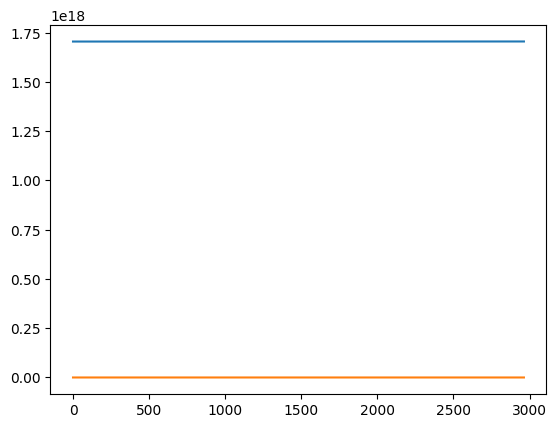

In [22]:
plt.plot(timedata)

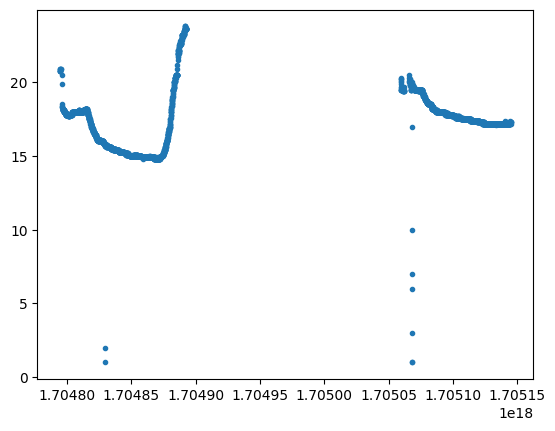

In [26]:
plt.plot(timedata[:,0], timedata[:,1],".")

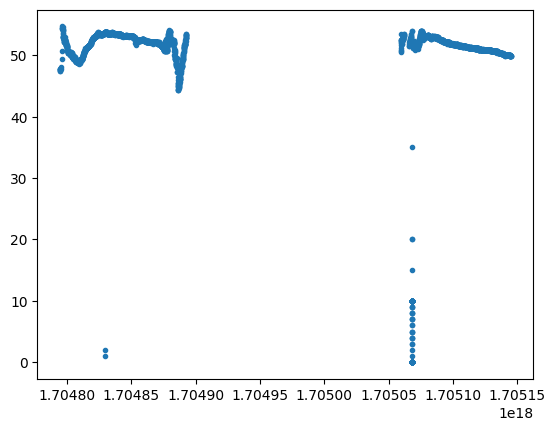

In [30]:
plt.plot(humidata[:,0], humidata[:,1],".")

In [31]:
#unix time stamps from January 1st 1970

In [33]:
timedata[:5,:]

array([[1.70479452e+18, 2.08000000e+01],
       [1.70479458e+18, 2.08000000e+01],
       [1.70479464e+18, 2.08000000e+01],
       [1.70479470e+18, 2.08000000e+01],
       [1.70479476e+18, 2.08000000e+01]])

In [36]:
#timedata[x][0] - timedata[0][0] for x in 

0.0

In [38]:
timedata[0,0]

1.7047945179240415e+18

In [39]:
timedata[0][0]

1.7047945179240415e+18

In [40]:
(timedata[:,0] - timedata[0,0]) * 1e-9

array([0.00000000e+00, 6.02181750e+01, 1.20372108e+02, ...,
       3.50381350e+05, 3.50441875e+05, 3.50502102e+05])

In [41]:
#we didn't need a list interpolation or loop here because
#we are in numpy and it does all vectorially
#if dimensions don't match then it will match the dimensions
#and then do it

In [42]:
timedata[:,0] = (timedata[:,0] - timedata[0,0]) * 1e-9

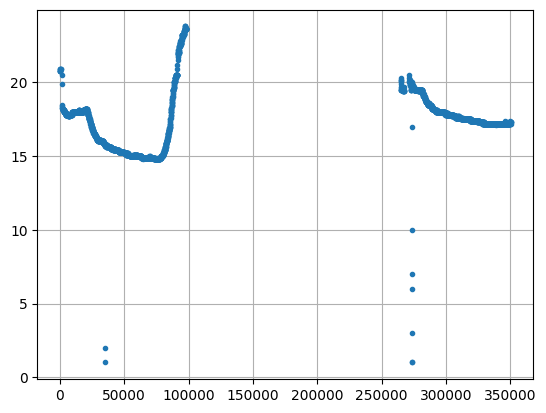

In [44]:
plt.plot(timedata[:,0], timedata[:,1],".")
plt.grid()

In [45]:
tdata = timedata[:95000,:]

In [46]:
tdata

array([[0.00000000e+00, 2.08000000e+01],
       [6.02181750e+01, 2.08000000e+01],
       [1.20372108e+02, 2.08000000e+01],
       ...,
       [3.50381350e+05, 1.73000000e+01],
       [3.50441875e+05, 1.73000000e+01],
       [3.50502102e+05, 1.72000000e+01]])

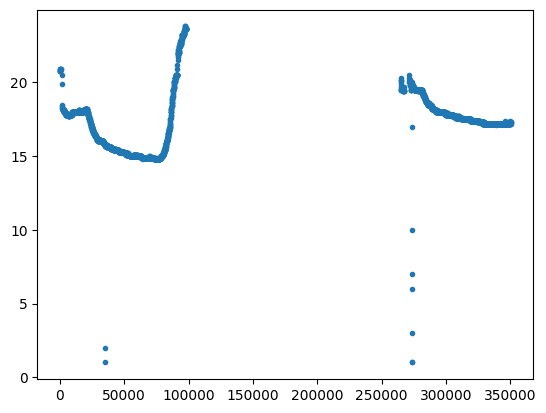

In [47]:
plt.plot(tdata[:,0], tdata[:,1],".")

In [48]:
#looks the same coz there are 2900 samples and not 95000

In [51]:
tdata = timedata [timedata[:,0]<99000,:]

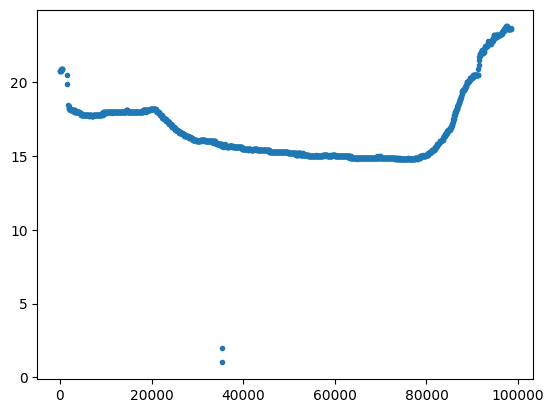

In [52]:
plt.plot(tdata[:,0], tdata[:,1],".")

In [56]:
#predict the temp is advance
#regression because we want decimals
#we do supervised learning 
#we need labels

In [57]:
#input is time
#output is temperature

In [103]:
xtrain, xtest, ytrain, ytest = train_test_split(tdata[:,0], tdata[:,1], test_size=0.3, stratify = )

InvalidParameterError: The 'stratify' parameter of train_test_split must be an array-like or None. Got False instead.

In [97]:
xtrain

array([22382.38878566, 46193.5267008 , 95625.29910426, ...,
        9723.12937395, 77238.4244631 , 38537.83798835])

In [98]:
np.corrcoef(xtrain,ytrain)

array([[1.        , 0.10053715],
       [0.10053715, 1.        ]])

In [100]:
xtrain.shape

(1131,)

In [104]:
#linear regression only for straight lines
m=sklearn.linear_model.LinearRegression()
m

LinearRegression()

In [105]:
m.fit_intercept

True

In [121]:
xchanged = xtrain.reshape(1,-1).T
xchanged.shape

(1131, 1)

In [122]:
ychanged = ytrain.reshape(1,-1).T

In [123]:
#m.fit(xtrain[0],ytrain[0])
m.fit(xchanged, ychanged)

LinearRegression()

In [124]:
xtestchanged = xtest.reshape(1,-1).T
xtestchanged.shape

(486, 1)

In [135]:
yh=m.predict(xtestchanged)
yh.shape

(486, 1)

In [89]:
#can't do random forest or linear regression if it is a single feature

In [94]:
#so we rank them by MSE

In [95]:
xtrain.shape

(1131,)

In [136]:
#np.corrcoef(yh,ytest)

In [132]:
ytestchanged = ytest.reshape(1,-1).T
ytestchanged.shape

(486, 1)

In [133]:
np.corrcoef(yh,ytestchanged)

C:\Users\YASHWANTH PINDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\YASHWANTH PINDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\YASHWANTH PINDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [138]:
np.corrcoef(yh,ytestchanged, rowvar = False)

array([[1.        , 0.15757987],
       [0.15757987, 1.        ]])

In [140]:
#np.corrcoef?

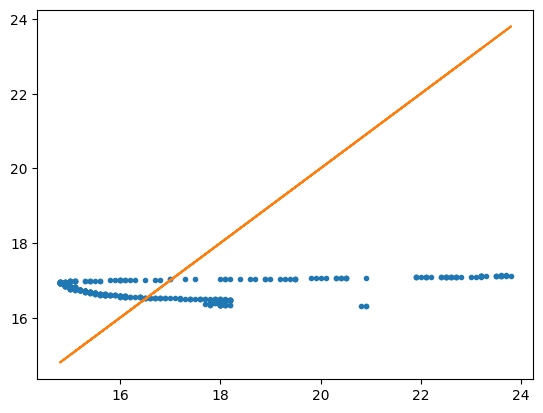

In [141]:
plt.plot(ytestchanged,yh,'.')
plt.plot(ytest,ytest)

In [142]:
#try MSE

In [143]:
#professor stuff

In [145]:
from sklearn.ensemble import RandomForestRegressor

In [166]:
X= tdata[:800,0].reshape(1,-1).T
Y= tdata[:800,1].reshape(1,-1).T
print(X.shape)
print(Y.shape)

(800, 1)
(800, 1)


In [167]:
#try SVR - support vector regression. MSE came as 7.7
#MSE - ideal value is 0.
#check notes Practical 12

In [168]:
#Linear regressor is best in this case

In [169]:
#so you need a prediction horizon because we are not able to predict too far
#into the future
#so you predict very near future, see MSE, and then continue to predict
#the future after that again. So you need a loop

In [170]:
from sklearn.ensemble import RandomForestRegressor

In [171]:
X=X[Y>10];
Y=Y[Y>10];

rf=SVR()
rf.fit(X,Y)

NameError: name 'SVR' is not defined

In [172]:
temps=tdata[:, 1]
X=np.array([temps[i:60+i] for i in range(len(temps)-60)])

In [173]:
y=temps[60:]

In [174]:
rf= LinearRegression()
rf.fit(X,y)

NameError: name 'LinearRegression' is not defined

In [176]:
#try to import text and csv data
#try it
#try house pricing. Try what to do with missing data. SOLVE problem

In [178]:
#https://www.bing.com/search?q=linear+prediction+coding&qs=UT&pq=linear+prediction+&sc=10-18&cvid=AECCD0F17DF64E5A9772F84CA3155F13&FORM=QBRE&sp=1&ghc=1&lq=0

In [179]:
#https://www.kaggle.com/datasets/crawford/computer-network-traffic